<a href="https://colab.research.google.com/github/TD91988/Exploratory-Data-Analysis/blob/master/EDA_for_Diabetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#drive.mount('/content/gdrive')

In [0]:
data=pd.read_csv('/content/gdrive/My Drive/EDA/diabetes.csv')
data.head()

**Describe the data in statistical way. Means what is count of columns, mean of column,standard daviation,minimum,maximum,etc.**

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum() # Check the missing values


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

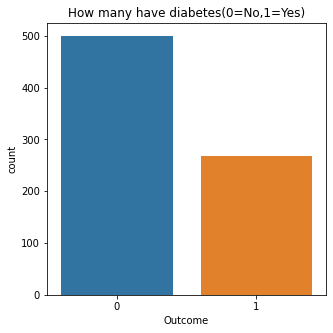

In [12]:
plt.figure(figsize=(5,5))
plt.title('How many have diabetes(0=No,1=Yes)')
locs, labels = plt.xticks()
sns.countplot(data['Outcome']);
data['Outcome'].value_counts();

**Visualization**

/usr/local/lib/python3.6/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


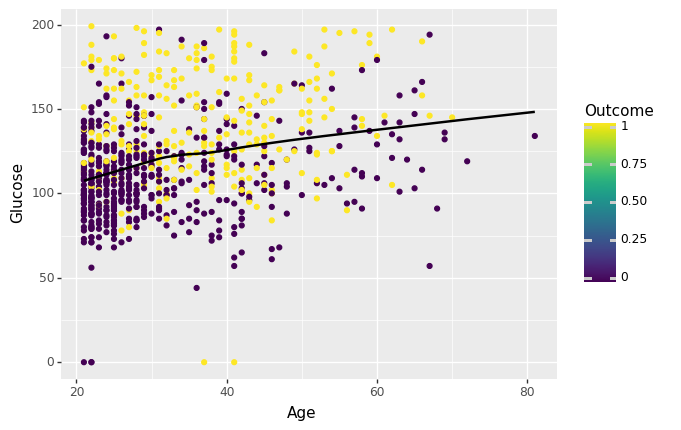

<ggplot: (-9223363286697377322)>

In [13]:
from plotnine import *
ggplot(data,aes(x='Age',y='Glucose',colour='Outcome'))+geom_point()+stat_smooth()

/usr/local/lib/python3.6/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


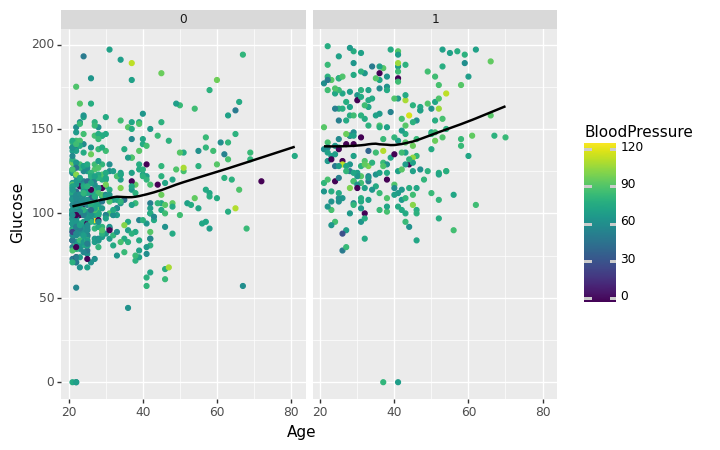

<ggplot: (8750138918064)>

In [14]:
ggplot(data,aes(x='Age',y='Glucose',colour='BloodPressure'))+geom_point()+stat_smooth()+facet_wrap('~Outcome')
#With high Glucose there are more number of people who have diabetes.

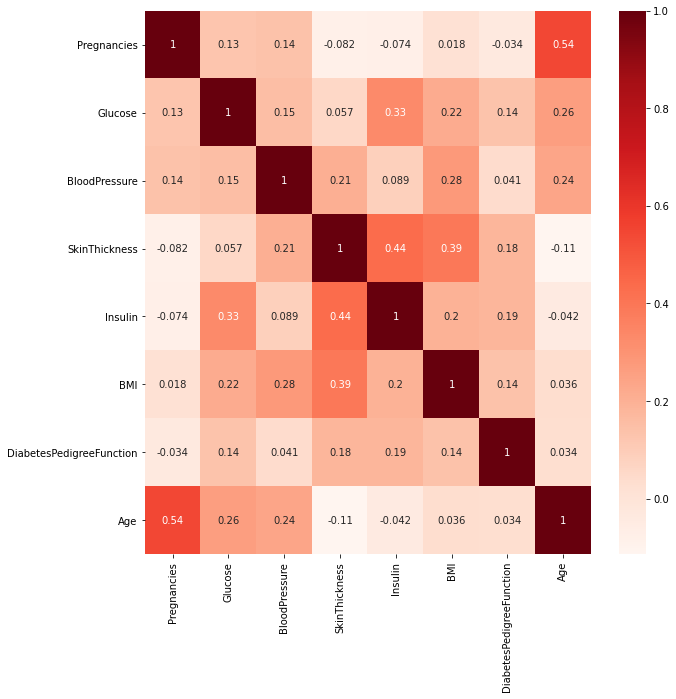

In [16]:
#Correlation of each column in data
m=data.loc[:,data.columns!='Outcome'].corr()
plt.figure(figsize=(10,10))
sns.heatmap(m,annot=True,cmap="Reds");

**So as we can see above there are correlation between few columns. Age is highly correlated with Pregnancies. Insulin is highly correlated with skinthickness. Also skinthickness is correlated with BMI.**

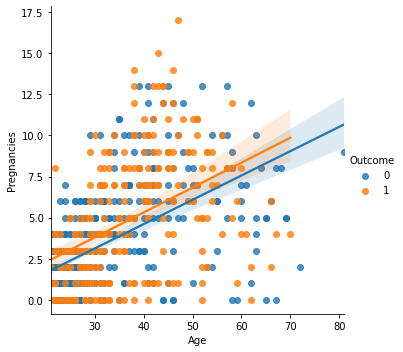

In [17]:
sns.lmplot(x='Age',y='Pregnancies',hue='Outcome',data=data);

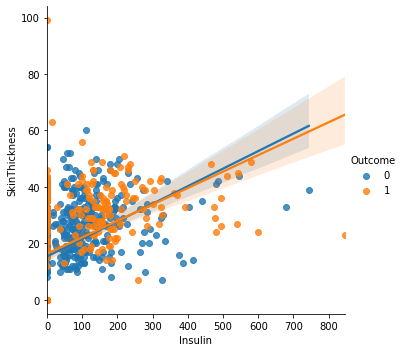

In [18]:
sns.lmplot(x='Insulin',y='SkinThickness',hue='Outcome',data=data);

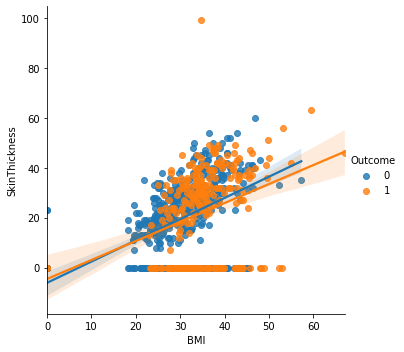

In [19]:
sns.lmplot(x='BMI',y='SkinThickness',hue='Outcome',data=data);

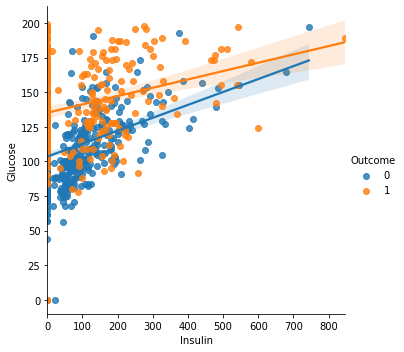

In [20]:
sns.lmplot(x='Insulin',y='Glucose',hue='Outcome',data=data);

**let's visualize pairplot using seabron, which will give plot against each column to another column.**

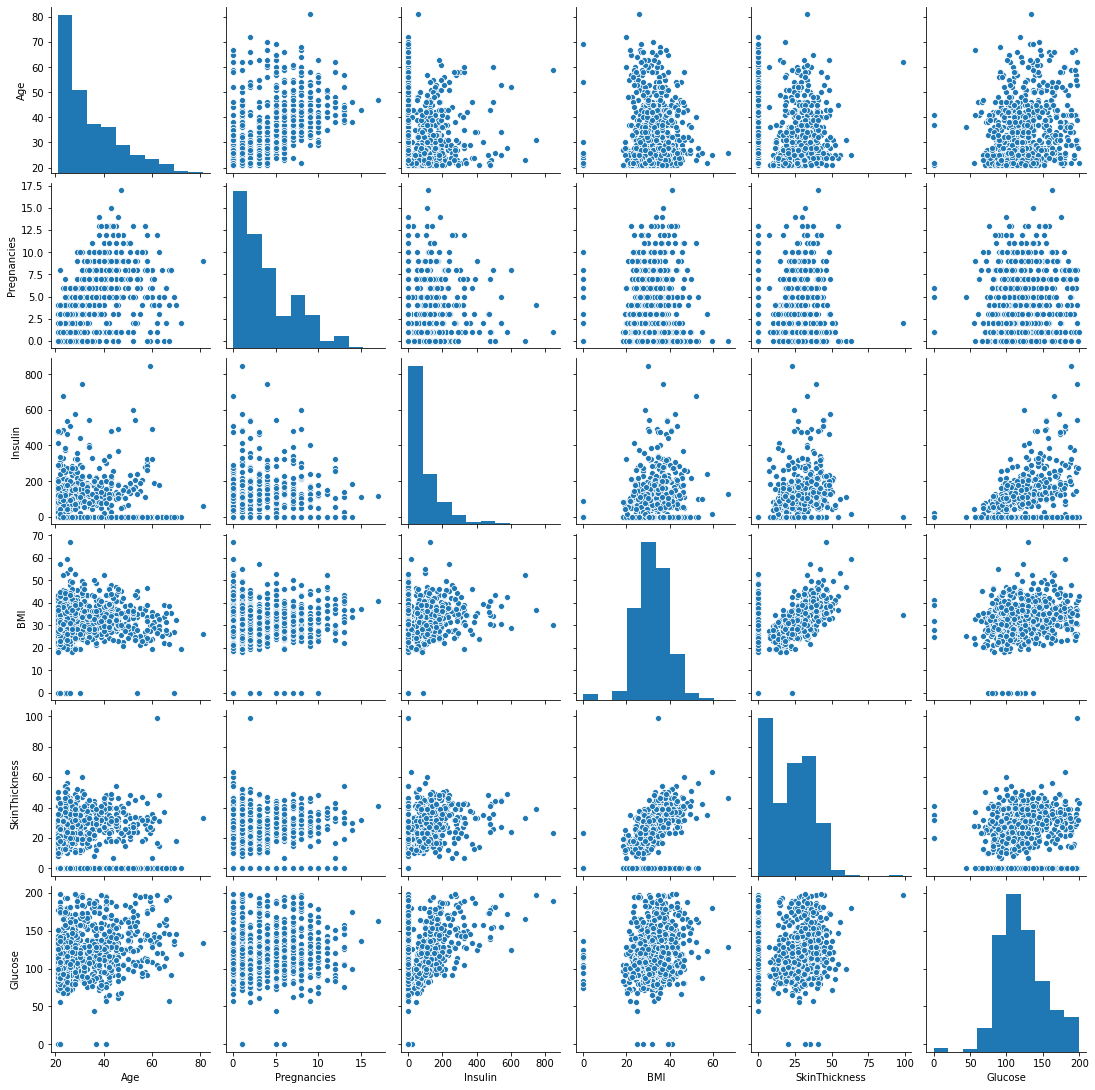

In [21]:
sns.pairplot(data[['Age','Pregnancies','Insulin','BMI','SkinThickness','Glucose']]);